In [39]:
import pandas as pd

PATH = './MKT.csv'
df   = pd.read_csv(PATH)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


A função '.info()' permite observar que existem quatro diferentes colunas, com 171 dados não nulos em cada uma, todos do tipo float64.

In [40]:
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


• A função '.describe()' permite observar as seguintes propriedades:
  → Contagem (count): Número de valores não nulos presentes em cada coluna.
  → Média (mean): Média aritmética dos valores da coluna.
  → Desvio padrão (std): Medida de dispersão dos valores em relação à média.
  → Valor mínimo (min): O menor valor presente na coluna.
  → Quartis (25%, 50%, 75%): Valores que dividem a distribuição em quartis (Q1, Q2 e Q3, respectivamente). O Q2 é equivalente à mediana.
  → Valor máximo (max): O maior valor presente na coluna.

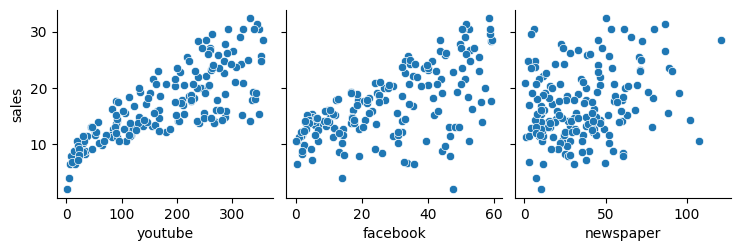

In [41]:
import seaborn as sns

sns.pairplot(df, x_vars=['youtube', 'facebook', 'newspaper'], y_vars='sales')

É possível observar, no primeiro gráfico com 'youtube', que as vendas aumentam, na maioria dos casos, em proporção ao aumento de invesvimentos na plataforma 'youtube'. Não necessariamente apresenta os maiores retornos de investimento, mas é o mais "confiável" em questões de proporção.
No segundo gráfico, nota-se que as vendas aumentam em alguns casos, mas com menos consistência, utilizando-se a plataforma 'facebook'. Contudo, nota-se que, em investimentos muito grandes, o 'facebook' pode atingir picos maiores.
Já com o 'newspaper', percebe-se que os investimentos são muito incertos, e em muitos casos o retorno é praticamente nenhum.
Sendo assim, é possível concluir que a plataforma 'youtube' teve um impacto maior nas vendas. Em sequência, será feita a análise das correlações para uma observação mais precisa.

<Axes: >

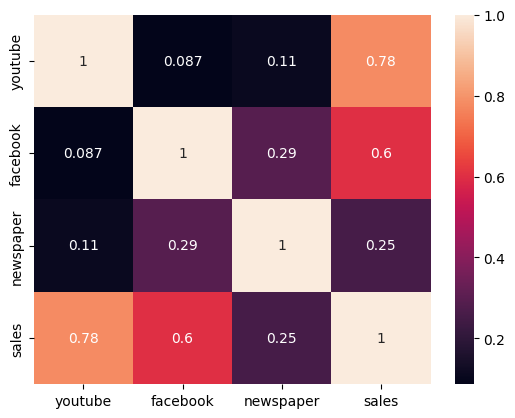

In [42]:
sns.heatmap(df.corr(), annot=True)

Utilizando-se da função '.corr()' (em conjunto com o heatmap), a visualização das correlações ficam mais evidenciadas. Como discutido acima, mas agora com análises estatísticas, é possível concluir que a relação de "Vendas vs Plataformas" é mais forte no 'youtube', seguido de 'facebook', e então 'newspaper'. Em valores: 0.78 -> 0.6 -> 0.25.

In [43]:
from sklearn.model_selection import train_test_split

x = df[['youtube', 'facebook', 'newspaper']]
y = df[['sales']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(119, 3)
(52, 3)
(119, 1)
(52, 1)


In [44]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)

from sklearn.metrics import r2_score

r = r2_score(y_test, y_pred)

print('R² ->', r)

R² -> 0.882423505618885


O R² score é uma medida estatística que indica a proporção da variância na variável dependente que é previsível a partir das variáveis independentes do modelo. Em outras palavras, ele quantifica a capacidade do modelo de explicar a variabilidade dos dados. O valor do R² score varia de 0 a 1, onde:
  → R² = 1: Indica que o modelo se ajusta perfeitamente aos dados e pode explicar toda a variabilidade presente na variável dependente.
  → R² = 0: Indica que o modelo não é melhor do que uma simples média dos valores da variável dependente para fazer previsões.
  → R² < 0: Indica que o modelo é pior do que a média e provavelmente está fazendo previsões completamente incorretas.

Text(0.5, 0, 'index')

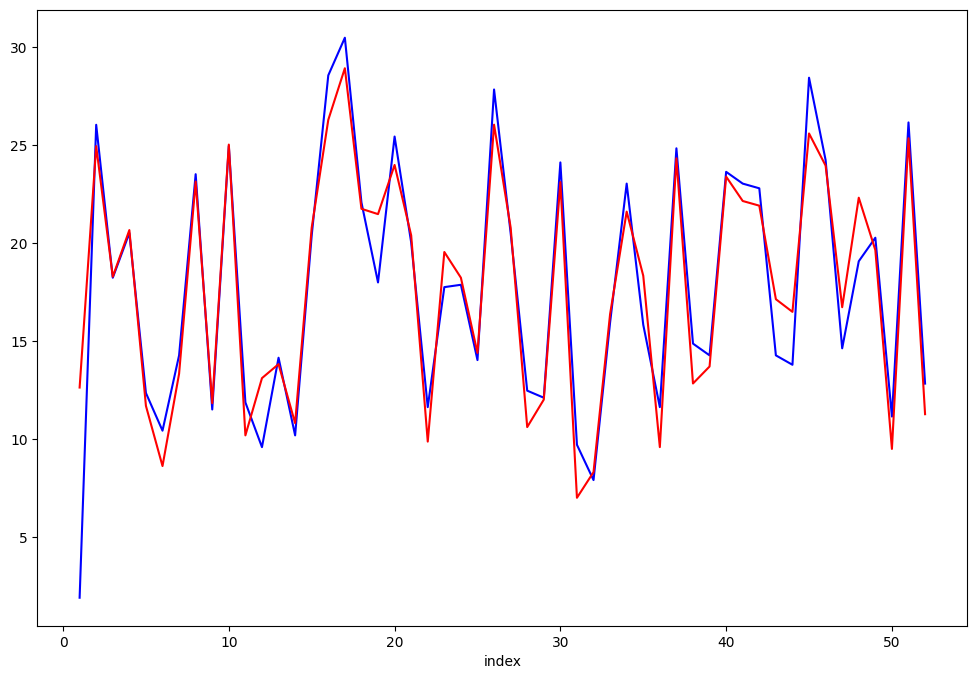

In [45]:
import matplotlib.pyplot as plt

c = [i for i in range(1, 53, 1)]

fig = plt.figure(figsize=(12,8))
plt.plot(c, y_test, color='blue')
plt.plot(c, y_pred, color='red')
plt.xlabel('index')

In [71]:
youtube = 50
facebook = 50
newspaper = 50
entry = [[youtube, facebook, newspaper]]
lm.predict(entry)[0]

c:\Users\jeanl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15.32327325])

In [69]:
youtube = 200
facebook = 50
newspaper = 50
entry = [[youtube, facebook, newspaper]]
lm.predict(entry)[0]

c:\Users\jeanl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([22.10607671])

In [70]:
youtube = 50
facebook = 200
newspaper = 50
entry = [[youtube, facebook, newspaper]]
lm.predict(entry)[0]

c:\Users\jeanl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([43.53268692])

In [68]:
youtube = 50
facebook = 50
newspaper = 5000
entry = [[youtube, facebook, newspaper]]
lm.predict(entry)[0]

c:\Users\jeanl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14.65196155])

As predições feitas mostram que a plataforma 'facebook' pode atingir os maiores retornos de investimento para as vendas, seguido da plataforma 'youtube'. O investimento em 'newspaper' apresenta um impacto praticamente inexistente perto das outras plataformas, pois mesmo com um valor extrapolado (dez vezes maior que os outros testes), apresentou até mesmo uma queda nas vendas com o aumento do seu investimento.
Vale notar que, apesar de o retorno na plataforma 'facebook' apresentar o maior valor de retorno em relação ao investimento, a plataforma 'youtube' apresenta uma maior correlação com as vendas, fazendo com que seja um investimento mais seguro para de atingir valores maiores de vendas, sendo a plataforma 'facebook' uma possibilidade de vendas ainda maiores, mas sem uma garantia de correlação em todos os casos.
Uma possível recomendação seria estudar melhor os casos em que a plataforma 'facebook' apresenta os seus maiores picos de vendas (possíveis épocas/datas, eventos, ocasionalidades).